In [1]:
%matplotlib inline
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import *

/home/tobiulla/.local/lib/python3.8/site-packages/qiskit/quantum_info/operators/pauli.py:107: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.zeros(len(label), dtype=np.bool)
/home/tobiulla/.local/lib/python3.8/site-packages/qiskit/quantum_info/operators/pauli.py:108: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros(len(label), dtype

## Introduction
With Spik3 the goal is to find a 3 qubit Quantum Circuit that has 3 outcomes with 1/3 probability each.

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ1 = QuantumCircuit(3,3)
circ2 = QuantumCircuit(3,3)
circ3 = QuantumCircuit(3,3)
circ4 = QuantumCircuit(3,3)

# spike1 solution
circ1.barrier(range(3))
circ1.measure(range(3),range(3))

# spike2 solution
circ2.h(2)
circ2.cx(2, 0)
circ2.cx(2, 1)
circ2.barrier(range(3))
circ2.measure(range(3),range(3))

# spike3 solution
circ3.h(2)
circ3.cx(2, 0)
circ3.cx(2, 1)
circ3.barrier(range(3))
circ3.measure(range(3),range(3))

# spike4 solution
circ4.h(2)
circ4.cx(2, 1)
circ4.h(0)
circ4.barrier(range(3))
circ4.measure(range(3),range(3))

circ1.draw()
circ2.draw()
circ3.draw()
circ4.draw()

/home/tobiulla/.local/lib/python3.8/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
/home/tobiulla/.local/lib/python3.8/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precisi

┌───┐      ░ ┌─┐      
q_0: ┤ H ├──────░─┤M├──────
     └───┘┌───┐ ░ └╥┘┌─┐   
q_1: ─────┤ X ├─░──╫─┤M├───
     ┌───┐└─┬─┘ ░  ║ └╥┘┌─┐
q_2: ┤ H ├──■───░──╫──╫─┤M├
     └───┘      ░  ║  ║ └╥┘
c: 3/══════════════╩══╩══╩═
                   0  1  2

{'000': 535, '111': 489}


/home/tobiulla/.local/lib/python3.8/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
/home/tobiulla/.local/lib/python3.8/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precisi

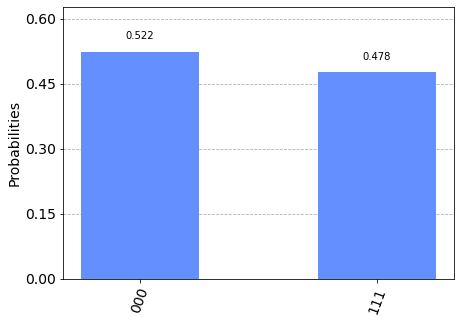

In [9]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(circ, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
plot_histogram(counts)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])